Instructions:

Your final report should be written up in a Jupyter notebook.  It should be posted to a public Github repo as an ipynb  submitted to this assignment via courseworks.  Please include the link to your Github repo in this ipynb file.

You are welcome, but not required, to add any other country level features you would like to your dataset before using the data to complete your report. 

Your report should include the following information:

Explore bivariate results (Use visualizations!)
Describe any relationships you see between particular features and the target variable

Examine features that predict happiness categories using one or more models that allow for automatic feature selection
Explain any meaningful findings

Experiment with different prediction models to try to predict World Happiness well (Fit and compare, at minimum, three models)
submit three models to the model share leaderboard before you start communicating with your team.

After you submit your first three models, describe your best model with your team via your team slack channel

Fit and submit up to three more models after learning from your team.

Discuss which models you tried and which models performed better and point out relevant hyper-parameter values for successful models.

Submit your best models to the leaderboard for the World Happiness AI Model Share competition.

You have the option to present and/or discuss these models in your report, but it is not required.

# Import data

In [1]:
#install aimodelshare library
! pip install aimodelshare --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 967.0/967.0 KB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.3/442.3 KB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 KB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 KB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/30

In [2]:
#Get competition data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall()

In [3]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head()

Country or region  GDP per capita  Social support  Healthy life expectancy  \
0              Peru           0.960           1.274                    0.854   
1         Nicaragua           0.694           1.325                    0.835   
2            Greece           1.181           1.156                    0.999   
3             Qatar           1.684           1.313                    0.871   
4        Uzbekistan           0.745           1.529                    0.756   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.455       0.083                      0.027   
1                         0.435       0.200                      0.127   
2                         0.067       0.000                      0.034   
3                         0.555       0.220                      0.167   
4                         0.631       0.322                      0.240   

         name    region                       sub-region  Terrorist_attacks  
0        Peru  Americas  Latin America and the Caribbean          18.000000  
1   Nicaragua  Americas  Latin America and the Caribbean         125.611111  
2      Greece    Europe                  Southern Europe         112.000000  
3       Qatar      Asia                     Western Asia          57.333333  
4  Uzbekistan      Asia                     Central Asia         125.611111

# Bivariate Visualizations

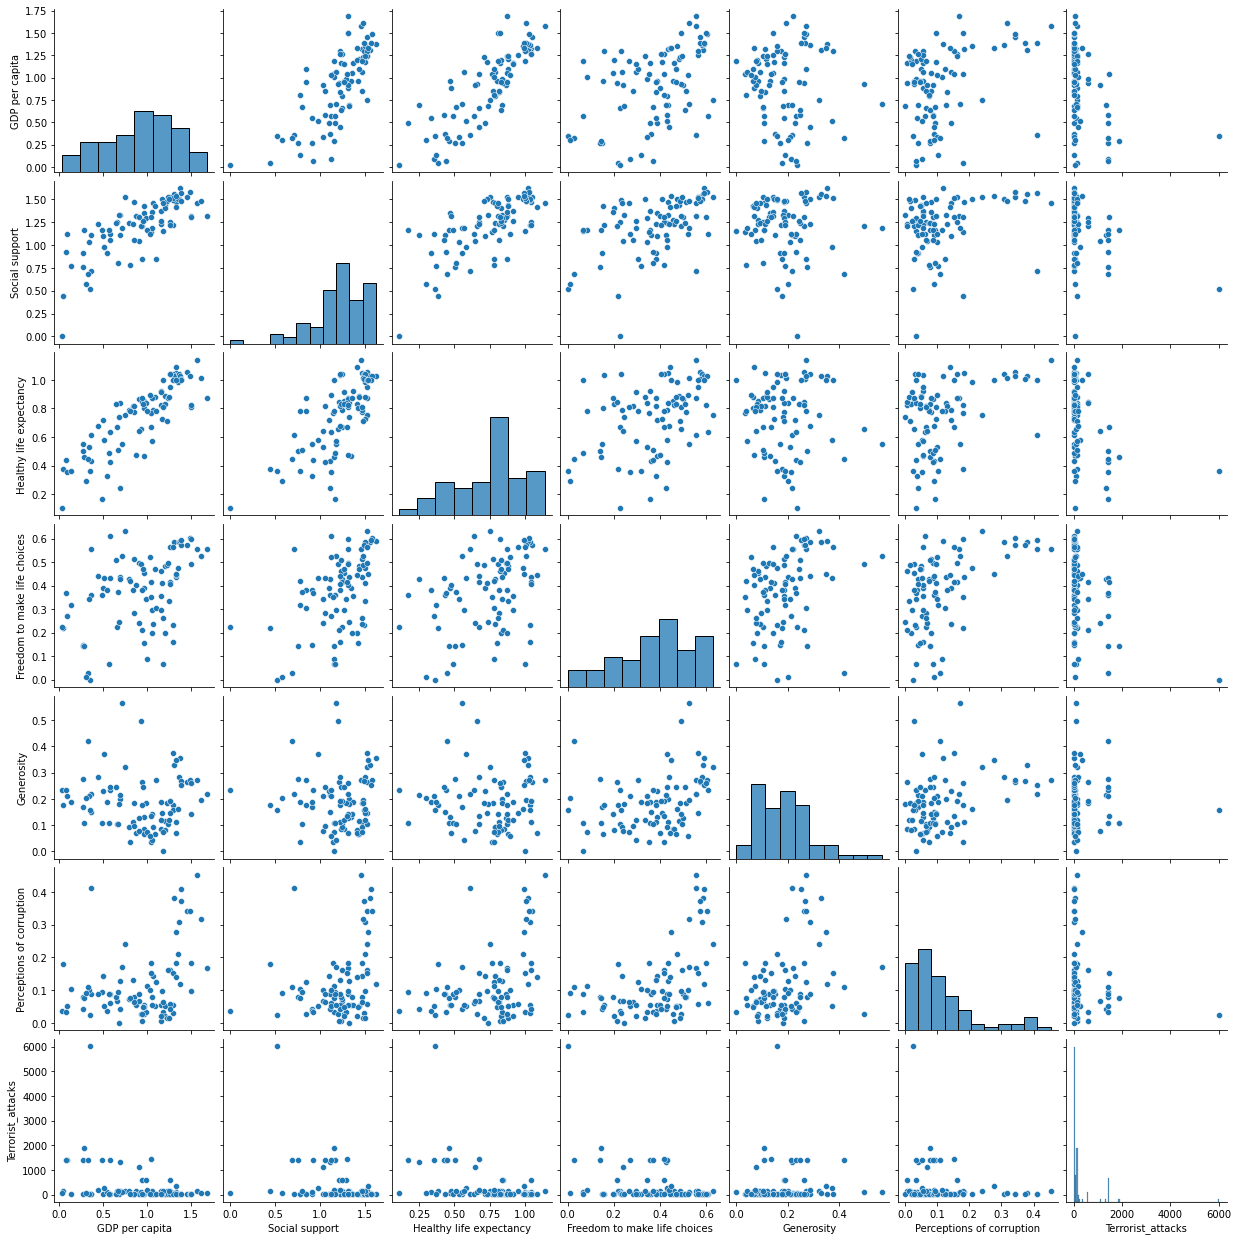

In [ ]:
import seaborn as sns
pairplots = sns.pairplot(X_train)

From the pairplots, we can see that GDP per capita, Social support, and Healthy life expectancy have strong correlations.

Text(0, 0.5, 'Happiness')

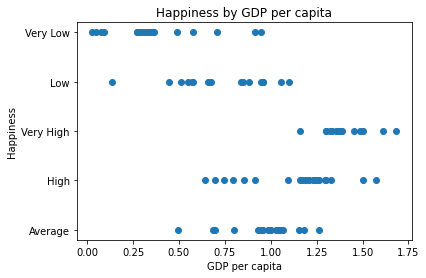

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(X_train['GDP per capita'], y_train_labels)
plt.title('Happiness by GDP per capita')
plt.xlabel('GDP per capita')
plt.ylabel('Happiness')

Happiness and GDP per capita have strong positive correlation.

Text(0, 0.5, 'Happiness')

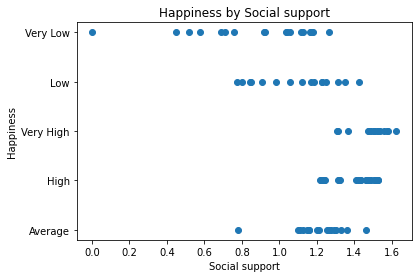

In [ ]:
plt.scatter(X_train['Social support'], y_train_labels)
plt.title('Happiness by Social support')
plt.xlabel('Social support')
plt.ylabel('Happiness')

Happiness and Social support also have  positive correlation.

Text(0, 0.5, 'Happiness')

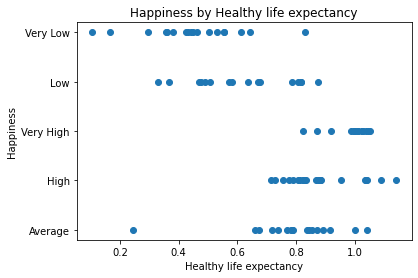

In [ ]:
plt.scatter(X_train['Healthy life expectancy'], y_train_labels)
plt.title('Happiness by Healthy life expectancy')
plt.xlabel('Healthy life expectancy')
plt.ylabel('Happiness')

Happiness and Healthy life expectancy have positive correlation, too.

Text(0, 0.5, 'Happiness')

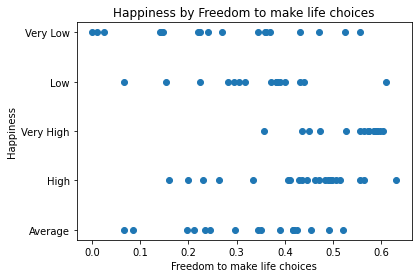

In [ ]:
plt.scatter(X_train['Freedom to make life choices'], y_train_labels)
plt.title('Happiness by Freedom to make life choices')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness')

Text(0, 0.5, 'Happiness')

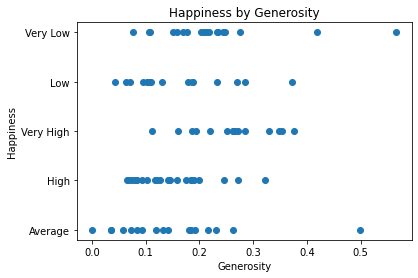

In [ ]:
plt.scatter(X_train['Generosity'], y_train_labels)
plt.title('Happiness by Generosity')
plt.xlabel('Generosity')
plt.ylabel('Happiness')

Text(0, 0.5, 'Happiness')

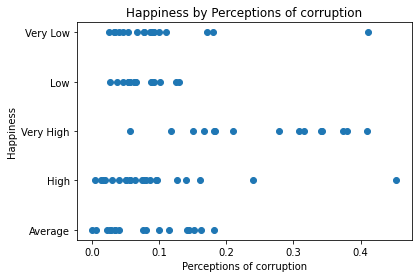

In [ ]:
plt.scatter(X_train['Perceptions of corruption'], y_train_labels)
plt.title('Happiness by Perceptions of corruption')
plt.xlabel('Perceptions of corruption')
plt.ylabel('Happiness')

Text(0, 0.5, 'Happiness')

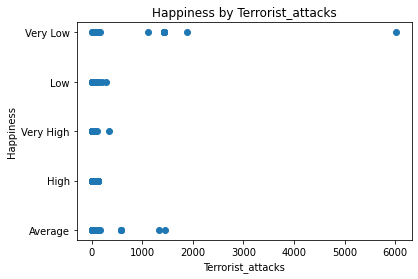

In [ ]:
plt.scatter(X_train['Terrorist_attacks'], y_train_labels)
plt.title('Happiness by Terrorist_attacks')
plt.xlabel('Terrorist_attacks')
plt.ylabel('Happiness')

No obvious relationship is observed between these other variables and the target variable.

# Preprocess data

In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [5]:
#Create the preprocessing pipeline for numeric data

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

#Replace missing values with median and then scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [6]:
#Create the preprocessing pipelines for categorical data
categorical_features = ['region', 'sub-region']

#Replace missing values with Modal value and then one hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [7]:
#Final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 

In [8]:
# Write function to transform data with preprocessor
def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [ ]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(88, 26)

In [ ]:
preprocessor(X_train)

array([[ 0.10444464,  0.20603101,  0.45831144, ...,  0.        ,
         0.        ,  0.        ],
       [-0.54388211,  0.38059533,  0.37791099, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.64309205, -0.19786289,  1.07189386, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.01356448,  1.10965806,  1.05919905, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.27261963, -0.30397062,  0.62334396, ...,  0.        ,
         0.        ,  0.        ],
       [-0.5950658 , -1.4198131 , -1.00582315, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
X_train.shape

(88, 11)

# Model 1 Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'n_estimators': np.arange(100, 300, 500),'max_depth':[1, 3, 5, 7, 9, 11]} #np.arange creates sequence of numbers for each k value

gridmodel = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)
gridmodel.fit(preprocessor(X_train), y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))

best mean cross-validation score: 0.679
best parameters: {'max_depth': 11, 'n_estimators': 100}


In [30]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

Your preprocessor is now saved to 'preprocessor.zip'


In [31]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(gridmodel, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [24]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [25]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [ ]:
#Submit Model 1: 

#-- Generate predicted values (Model 1)
prediction_labels = gridmodel.predict(preprocessor(X_test))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 615

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [ ]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)

# Model 2 Gradient Boosting Classifier

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid2 = {'n_estimators': np.arange(100, 300, 500),'learning_rate': [0.1, 1.0], 'max_depth':[1, 3, 5, 7]} #np.arange creates sequence of numbers for each k value

gridmodel2 = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid2, cv=10)
gridmodel2.fit(preprocessor(X_train), y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel2.best_score_))
print("best parameters: {}".format(gridmodel2.best_params_))

best mean cross-validation score: 0.660
best parameters: {'learning_rate': 1.0, 'max_depth': 5, 'n_estimators': 100}


In [33]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(gridmodel2, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model2.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [34]:
#Submit Model 2: 

#-- Generate predicted values (Model 2)
prediction_labels2 = gridmodel2.predict(preprocessor(X_test))

# Submit Model 2 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model2.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels2)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 767

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [ ]:
# Get leaderboard

data = mycompetition.get_leaderboard()

mycompetition.stylize_leaderboard(data)

# Model 3 Keras

In [38]:
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Activation

feature_count=preprocessor(X_train).shape[1] #count features in input data

keras_model = Sequential()
keras_model.add(Dense(128, input_dim=feature_count, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dense(5, activation='softmax')) 
                                            
# Compile model
sgd = SGD(lr=0.01) 
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20, 
               epochs = 300, validation_split=0.25)  

Epoch 1/300


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 92ms/step - loss: 1.6118 - accuracy: 0.2121 - val_loss: 1.5923 - val_accuracy: 0.3182
Epoch 2/300
4/4 [==============================] - 0s 17ms/step - loss: 1.6052 - accuracy: 0.2576 - val_loss: 1.5897 - val_accuracy: 0.2727
Epoch 3/300
4/4 [==============================] - 0s 23ms/step - loss: 1.6001 - accuracy: 0.2576 - val_loss: 1.5872 - val_accuracy: 0.3636
Epoch 4/300
4/4 [==============================] - 0s 37ms/step - loss: 1.5957 - accuracy: 0.2727 - val_loss: 1.5845 - val_accuracy: 0.3636
Epoch 5/300
4/4 [==============================] - 0s 36ms/step - loss: 1.5908 - accuracy: 0.2576 - val_loss: 1.5814 - val_accuracy: 0.1818
Epoch 6/300
4/4 [==============================] - 0s 32ms/step - loss: 1.5842 - accuracy: 0.3030 - val_loss: 1.5799 - val_accuracy: 0.1818
Epoch 7/300
4/4 [==============================] - 0s 24ms/step - loss: 1.5784 - accuracy: 0.3030 - val_loss: 1.5768 - val_accuracy: 0.2273
Epoch 8/300
4/4 [===============

In [39]:
# Save keras model to ONNX file 
onnx_model = model_to_onnx(keras_model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model3.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [40]:
# Submit keras model: 

#-- Generate predicted y values
#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index=keras_model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels 
prediction_labels3 = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 3 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model3.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels3)

3/3 [==============================] - 0s 6ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 772

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [ ]:
# Get leaderboard 

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

# Discussion

I experimented with three types of models: Random Forest, Gradient Boosting, and keras models. 

I tuned 2 hyper-parameters,  n_estimators and max_depth, in Random Forest model. n_estimators=100 and max_depth=11 give my best model. However, max_depth of 7, 9, or 11 result in roughly the same performance.

For Gradient Boosting, I use GridSearchCV to tune the hyper-parameters: n_estimators,learning_rate, and max_depth. My third model is a keras model with 5 hidden layers, where activation is set to relu and sgd lr=0.01.  But the model performancec are still not satisfying. I hope to learn more from other group's models in class.


